In [ ]:
import pandas as pd
import numpy as np #Membaca dataset, memproses dataset
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from google.colab import files
import io
import re, string, unicodedata, ast

In [ ]:
#df = pd.read_csv("Data_Label_Pakar2.csv")
df = pd.read_csv("Label_Pakar99.csv")

In [ ]:
df.head()

,text,label
0,earthquak leav 4 300 dead turkey syria peopl l...,positif
1,god pleas help sad,positif
2,alkhidmat foundat pakistan collabor turkish pa...,neutral
3,syria voic,neutral
4,may allah protect turkey syria,positif


In [ ]:
df.shape

(1028, 2)

# **Preprocessing**

### ***Cleansing***

In [ ]:
# Hapus Tagar & URL
def deleteTagTwitter(text):
  return re.sub(r"[@#]\w+|\||\_|\.n|#", r"", text)
df['text'] = df['text'].apply(lambda x: deleteTagTwitter(x))

def deleteHttps(text):
  return re.sub(r"http\S+", r"", text)
df['text'] = df['text'].apply(lambda x: deleteHttps(x))

def remove_punctuation(text):
  #text
  text= re.sub(r'[^a-zA-z0-9]',' ',str(text))
  text= re.sub(r'\b\w(1,2)\b',' ',text) #menghilangkan 2 kata
  text= re.sub(r'\s\s+',' ',text)
  return text
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

def cleaning_text(text):
  text = re.sub(r'[@]',r' ',text)
  return text
df['text'] = df['text'].apply(lambda x: cleaning_text(x))
df.head()

,text,label
0,earthquak leav 4 300 dead turkey syria peopl l...,positif
1,god pleas help sad,positif
2,alkhidmat foundat pakistan collabor turkish pa...,neutral
3,syria voic,neutral
4,may allah protect turkey syria,positif


In [ ]:
df['case folding'] = df['text'].str.lower() #Menggunakan fungsi Series.str.lower() pada Pandas

df.head()

,text,label,case folding
0,earthquak leav 4 300 dead turkey syria peopl l...,positif,earthquak leav 4 300 dead turkey syria peopl l...
1,god pleas help sad,positif,god pleas help sad
2,alkhidmat foundat pakistan collabor turkish pa...,neutral,alkhidmat foundat pakistan collabor turkish pa...
3,syria voic,neutral,syria voic
4,may allah protect turkey syria,positif,may allah protect turkey syria


### ***Tokenizing***

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def word_tokennize_wrapper(text):
  return word_tokenize(text)
df['tokenizing'] = df['case folding'].apply(lambda x: word_tokennize_wrapper(x))

df.head(10)

,text,label,case folding,tokenizing
0,earthquak leav 4 300 dead turkey syria peopl l...,positif,earthquak leav 4 300 dead turkey syria peopl l...,"[earthquak, leav, 4, 300, dead, turkey, syria,..."
1,god pleas help sad,positif,god pleas help sad,"[god, pleas, help, sad]"
2,alkhidmat foundat pakistan collabor turkish pa...,neutral,alkhidmat foundat pakistan collabor turkish pa...,"[alkhidmat, foundat, pakistan, collabor, turki..."
3,syria voic,neutral,syria voic,"[syria, voic]"
4,may allah protect turkey syria,positif,may allah protect turkey syria,"[may, allah, protect, turkey, syria]"
5,prayer turkey syria lebanon may allah help pro...,positif,prayer turkey syria lebanon may allah help pro...,"[prayer, turkey, syria, lebanon, may, allah, h..."
6,heartbreak news turkey sriya power earthquak h...,positif,heartbreak news turkey sriya power earthquak h...,"[heartbreak, news, turkey, sriya, power, earth..."
7,hazrat ayesha ra said power 7 8 cypru,neutral,hazrat ayesha ra said power 7 8 cypru,"[hazrat, ayesha, ra, said, power, 7, 8, cypru]"
8,turkey,neutral,turkey,[turkey]
9,earthquak leav 4 300 dead turkey syria,positif,earthquak leav 4 300 dead turkey syria,"[earthquak, leav, 4, 300, dead, turkey, syria]"


### ***Filtering***

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('english')
#Menambahkan stopword manual
list_stopwords.extend(['amp'])

def remove_stopwords(text):
  text = [word for word in text if word not in list_stopwords]
  return text

df['filtering'] = df['tokenizing'].apply(lambda x: remove_stopwords(x))
df.head()

,text,label,case folding,tokenizing,filtering
0,earthquak leav 4 300 dead turkey syria peopl l...,positif,earthquak leav 4 300 dead turkey syria peopl l...,"[earthquak, leav, 4, 300, dead, turkey, syria,...","[earthquak, leav, 4, 300, dead, turkey, syria,..."
1,god pleas help sad,positif,god pleas help sad,"[god, pleas, help, sad]","[god, pleas, help, sad]"
2,alkhidmat foundat pakistan collabor turkish pa...,neutral,alkhidmat foundat pakistan collabor turkish pa...,"[alkhidmat, foundat, pakistan, collabor, turki...","[alkhidmat, foundat, pakistan, collabor, turki..."
3,syria voic,neutral,syria voic,"[syria, voic]","[syria, voic]"
4,may allah protect turkey syria,positif,may allah protect turkey syria,"[may, allah, protect, turkey, syria]","[may, allah, protect, turkey, syria]"


### ***Stemming***

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['filtering'].apply(lambda x: stemming(x))

df.head()

,text,label,case folding,tokenizing,filtering,stemmed
0,earthquak leav 4 300 dead turkey syria peopl l...,positif,earthquak leav 4 300 dead turkey syria peopl l...,"[earthquak, leav, 4, 300, dead, turkey, syria,...","[earthquak, leav, 4, 300, dead, turkey, syria,...","[earthquak, leav, 4, 300, dead, turkey, syria,..."
1,god pleas help sad,positif,god pleas help sad,"[god, pleas, help, sad]","[god, pleas, help, sad]","[god, plea, help, sad]"
2,alkhidmat foundat pakistan collabor turkish pa...,neutral,alkhidmat foundat pakistan collabor turkish pa...,"[alkhidmat, foundat, pakistan, collabor, turki...","[alkhidmat, foundat, pakistan, collabor, turki...","[alkhidmat, foundat, pakistan, collabor, turki..."
3,syria voic,neutral,syria voic,"[syria, voic]","[syria, voic]","[syria, voic]"
4,may allah protect turkey syria,positif,may allah protect turkey syria,"[may, allah, protect, turkey, syria]","[may, allah, protect, turkey, syria]","[may, allah, protect, turkey, syria]"


In [ ]:
# Export to csv file
df.to_csv('Hasil_Preprocessing_Tes.csv', index = False, header = True,index_label=None)

# ***TF-IDF***

### Github

In [28]:
import ast
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

In [29]:
import pandas as pd
import numpy as np

Data_Prep = pd.read_csv("Hasil_Preprocessing_Manual0.csv", usecols=["label", "stemmed"])
Data_Prep.columns = ["label", "tweet"]
pd.set_option('max_colwidth',1)

Data_Prep.head(10)

,label,tweet
0,positif,"['earthquak', 'leav', '4', '300', 'dead', 'turkey', 'syria', 'peopl', 'lost', 'entir', 'famili']"
1,positif,"['god', 'plea', 'help', 'sad']"
2,neutral,"['alkhidmat', 'foundat', 'pakistan', 'collabor', 'turkish', 'partner', 'organ', 'respond', 'ground']"
3,neutral,"['syria', 'voic']"
4,positif,"['may', 'allah', 'protect', 'turkey', 'syria']"
5,positif,"['prayer', 'turkey', 'syria', 'lebanon', 'may', 'allah', 'help', 'protect', 'effect', 'merci', 'everyon']"
6,positif,"['heartbreak', 'news', 'turkey', 'sriya', 'power', 'earthquak', 'hit', 'stay', 'safe', 'everyon']"
7,neutral,"['hazrat', 'ayesha', 'ra', 'said', 'power', '7', '8', 'cypru']"
8,neutral,['turkey']
9,positif,"['earthquak', 'leav', '4', '300', 'dead', 'turkey', 'syria']"


In [30]:
# Menggabungkan Token Menjadi List Bentuk Kalimat
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
Data_Prep["tweet_join"] = Data_Prep["tweet"].apply(join_text_list)

Data_Prep["tweet_join"].head(10)

0    earthquak leav 4 300 dead turkey syria peopl lost entir famili          
1    god plea help sad                                                       
2    alkhidmat foundat pakistan collabor turkish partner organ respond ground
3    syria voic                                                              
4    may allah protect turkey syria                                          
5    prayer turkey syria lebanon may allah help protect effect merci everyon 
6    heartbreak news turkey sriya power earthquak hit stay safe everyon      
7    hazrat ayesha ra said power 7 8 cypru                                   
8    turkey                                                                  
9    earthquak leav 4 300 dead turkey syria                                  
Name: tweet_join, dtype: object

In [45]:
X_join = Data_Prep["tweet_join"]
#contoh untuk mengetahui jumlah term dari 1 dokumen
komen_tf = X_join[0],
print(komen_tf)

('earthquak leav 4 300 dead turkey syria peopl lost entir famili',)


In [46]:
#jumlah term tokenizing
cv = CountVectorizer()
term_fit = cv.fit(X_join)

term_frequency = term_fit.transform(komen_tf) #hanya menampilkan hasil document 1
#kolom 1 = dokumen ke-
#kolom 2 = term ke-
#kolom 3 = jumlah term dalam 1 dokumen
print ("Jumlah Kemunculan Kata")
print (term_frequency)

Jumlah Kemunculan Kata
  (0, 82)	1
  (0, 749)	1
  (0, 888)	1
  (0, 941)	1
  (0, 1023)	1
  (0, 1531)	1
  (0, 1594)	1
  (0, 1915)	1
  (0, 2509)	1
  (0, 2645)	1


Ouput diatas merupakan jumlah kemunculan kata dari 1 dokumen
*   kolom 1 = dokumen ke-
*   kolom 2 = term ke-
*   kolom 3 = jumlah term dalam 1 dokumen







In [47]:
max_features = 1000

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(Data_Prep["tweet_join"]).toarray()

terms = tf_idf.get_feature_names_out()

# sum tfidf frequency dari setiap dokumen
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data_prep = []
for col, term in enumerate(terms):
    data_prep.append((term, sums[col] ))

ranking = pd.DataFrame(data_prep, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
937,turkey,73.363945
261,earthquak,66.418678
888,syria,51.652404
407,help,28.315383
652,peopl,28.066214
...,...,...
806,seismolog,0.592827
363,geophi,0.592827
634,page,0.589730
720,rabb,0.573713


* Data diatas merupakan Frekuensi Kata yang paling sering muncul dari setiap dokumen



In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(Data_Prep["tweet_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(Data_Prep["tweet_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(Data_Prep["tweet"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t",
               "%.3f" % item[0], "\t",
               "%.3f" % item[1], "\t",
               "%.3f" % item[2])

Show TFIDF sample ke-0 

['earthquak', 'leav', '4', '300', 'dead', 'turkey', 'syria', 'peopl', 'lost', 'entir', 'famili'] 

	 	Term 	 TF 	 IDF 	 TF-IDF

                 300 	 0.100 	 5.856 	 0.586
                dead 	 0.100 	 4.603 	 0.460
           earthquak 	 0.100 	 1.514 	 0.151
               entir 	 0.100 	 5.989 	 0.599
              famili 	 0.100 	 4.352 	 0.435
                leav 	 0.100 	 5.633 	 0.563
                lost 	 0.100 	 4.568 	 0.457
               peopl 	 0.100 	 2.911 	 0.291
               syria 	 0.100 	 2.158 	 0.216
              turkey 	 0.100 	 1.431 	 0.143


# **Klasifikasi *Naive Bayes***

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [50]:
data = pd.read_csv("Hasil_Preprocessing_Manual0.csv", usecols=["label", "stemmed"])
pd.set_option('max_colwidth',1)

print('Data Sentimen Tweet Gempa Turki :',data.shape)

Data Sentimen Tweet Gempa Turki : (1028, 2)


In [51]:
data['label_num'] = data.label.map({'positif':1,'negatif':-1,'neutral':0})

#X merupakan Doc tweet dan Y merupakan Label/kelas sentimen prediksi
X = Data_Prep["tweet_join"]
Y = data.label_num

df = pd.DataFrame(Y)

df.set_index(X)

,label_num
tweet_join,
earthquak leav 4 300 dead turkey syria peopl lost entir famili,1
god plea help sad,1
alkhidmat foundat pakistan collabor turkish partner organ respond ground,0
syria voic,0
may allah protect turkey syria,1
...,...
read stori possibl fatal quiescenc told spare strike prose wake februari disastr earthquak one wonder edg possess farsight,-1
132 613 number peopl impact earthquak wreak devast across southern northwest commun met food evacu medic care shelter critic suppli,1
earthquak creat small canyon instantli turkey year certainli stretch believ god could creat someth like grand canyon quickli use geolog catastroph,1


**Keterangan**:1 = Positif 0 = Neutral -1 = Negatif







In [52]:
# Splitting the dataset into train and test data / membuat traning data set degan split data 80:20
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1)
print ('\n Jumlah Training Data :', ytrain.shape)
print ('\n Jumlah Testing Data :', ytest.shape)


 Jumlah Training Data : (925,)

 Jumlah Testing Data : (103,)


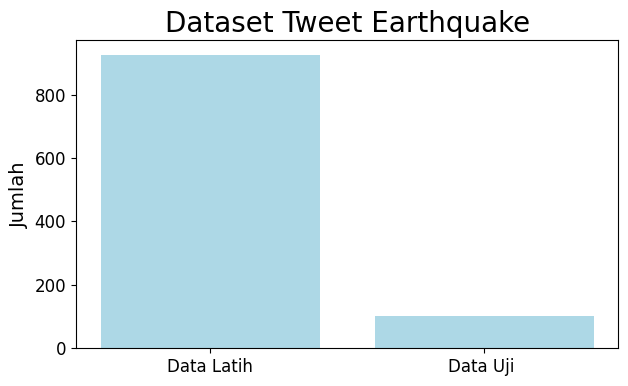

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,4))
plt.bar('Data Latih', ytrain.shape, color='lightblue')
plt.bar('Data Uji ', ytest.shape, color='lightblue')

plt.title('Dataset Tweet Earthquake', size=20)
plt.ylabel('Jumlah', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [54]:
print('Pembobotan Term Frequency', len(term_fit.vocabulary_))
print (term_fit.vocabulary_)

Pembobotan Term Frequency 2859
{'earthquak': 888, 'leav': 1531, '300': 82, 'dead': 749, 'turkey': 2645, 'syria': 2509, 'peopl': 1915, 'lost': 1594, 'entir': 941, 'famili': 1023, 'god': 1179, 'plea': 1949, 'help': 1273, 'sad': 2220, 'alkhidmat': 260, 'foundat': 1110, 'pakistan': 1883, 'collabor': 615, 'turkish': 2648, 'partner': 1897, 'organ': 1856, 'respond': 2160, 'ground': 1210, 'voic': 2737, 'may': 1647, 'allah': 261, 'protect': 2025, 'prayer': 1984, 'lebanon': 1532, 'effect': 904, 'merci': 1673, 'everyon': 974, 'heartbreak': 1261, 'news': 1788, 'sriya': 2419, 'power': 1979, 'hit': 1294, 'stay': 2432, 'safe': 2224, 'hazrat': 1249, 'ayesha': 374, 'ra': 2066, 'said': 2228, 'cypru': 731, 'heart': 1258, 'soul': 2387, 'arriv': 344, 'happi': 1231, 'must': 1746, 'feel': 1044, 'word': 2813, 'mani': 1625, 'die': 815, 'even': 968, 'warn': 2755, 'press': 1994, 'relea': 2129, 'jamaah': 1429, 'ansharu': 304, 'syariah': 2506, 'massiv': 1642, 'disast': 824, 'death': 754, 'toll': 2590, 'reach': 208

In [55]:
vectorizer = TfidfVectorizer (max_features=5000)
counts = vectorizer.fit_transform(X)

print ("Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF) \n")
print(counts)

Pembobotan Term Frequency-Inverse Document Frequency (TF-IDF) 

  (0, 1023)	0.3265098842140008
  (0, 941)	0.44211521617565985
  (0, 1594)	0.3423408902047038
  (0, 1915)	0.21935571262582537
  (0, 2509)	0.16271799430525544
  (0, 2645)	0.10798743861223344
  (0, 749)	0.34489998952206036
  (0, 82)	0.43322422236428704
  (0, 1531)	0.41807635406954435
  (0, 888)	0.11421785041086556
  (1, 2220)	0.6038803797363617
  (1, 1273)	0.33130084179681585
  (1, 1949)	0.44788007130207075
  (1, 1179)	0.5700628745363454
  (2, 1210)	0.32669317012899995
  (2, 2160)	0.3529095891055878
  (2, 1856)	0.3201233284959523
  (2, 1897)	0.32669317012899995
  (2, 2648)	0.22336869683860822
  (2, 615)	0.3653563543413482
  (2, 1883)	0.3089300808246488
  (2, 1110)	0.34273984141865027
  (2, 260)	0.4040195385536965
  (3, 2737)	0.9537301066298625
  (3, 2509)	0.3006640711953977
  :	:
  (1026, 2357)	0.2680256783385783
  (1026, 1937)	0.2680256783385783
  (1026, 1241)	0.2680256783385783
  (1026, 322)	0.2680256783385783
  (1026, 160)

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size = 0.1, random_state = 0)
#output the words or Tokens in the text documents
xtrain_dtm = cv.fit_transform(xtrain)
xtest_dtm = cv.transform(xtest)

In [60]:
# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

#printing accuracy, Confusion matrix, Precision and Recall
acc = metrics.accuracy_score(ytest,predicted)*100
conf = metrics.confusion_matrix(ytest,predicted)
rec = metrics.classification_report(ytest,predicted)

print('\n Nilai akurasi klasifikasi Naive Bayes dengan Ahli Bahasa: ', "%.5s" % acc + "%")
print('\n Classification report is: \n', rec)


 Nilai akurasi klasifikasi Naive Bayes dengan Ahli Bahasa:  66.01%

 Classification report is: 
               precision    recall  f1-score   support

          -1       0.56      0.69      0.62        29
           0       0.83      0.21      0.33        24
           1       0.70      0.86      0.77        50

    accuracy                           0.66       103
   macro avg       0.70      0.59      0.57       103
weighted avg       0.69      0.66      0.63       103



### Visualisasi Grafik Confusion Matrix

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

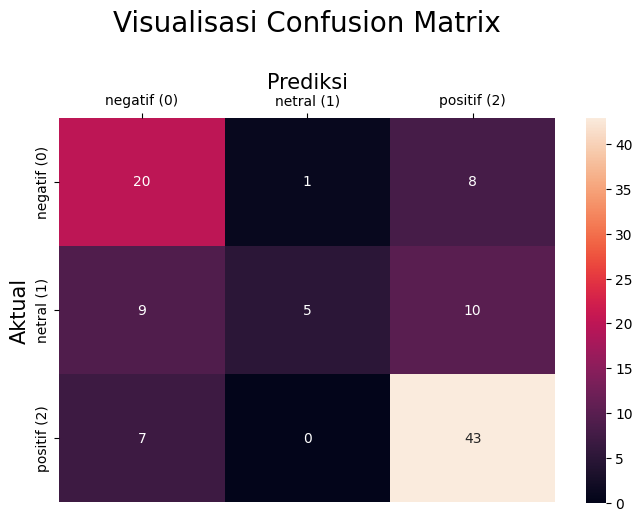

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,predicted), annot=True, fmt=".0f", ax=ax)
plt.title('Visualisasi Confusion Matrix\n', size=20)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize = 15)
ax.set_xticklabels(['negatif (0)', 'netral (1)', 'positif (2)'])
ax.set_ylabel('Aktual', fontsize = 15)
ax.set_yticklabels(['negatif (0)', 'netral (1)', 'positif (2)'])
plt.show()